170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/25
782/782 [==============================] - 375s 471ms/step - loss: 1.4533 - accuracy: 0.4834 - val_loss: 1.1453 - val_accuracy: 0.6029
Epoch 2/25
782/782 [==============================] - 360s 460ms/step - loss: 1.0441 - accuracy: 0.6356 - val_loss: 1.0447 - val_accuracy: 0.6421
Epoch 3/25
782/782 [==============================] - 352s 451ms/step - loss: 0.9102 - accuracy: 0.6846 - val_loss: 0.8212 - val_accuracy: 0.7108
Epoch 4/25
782/782 [==============================] - 347s 444ms/step - loss: 0.8119 - accuracy: 0.7178 - val_loss: 0.9263 - val_accuracy: 0.6921
Epoch 5/25
782/782 [==============================] - 356s 456ms/step - loss: 0.7362 - accuracy: 0.7405 - val_loss: 0.7214 - val_accuracy: 0.7503
Epoch 6/25
782/782 [==============================] - 348s 446ms/step - loss: 0.6776 - accuracy: 0.7604 - val_loss: 0.7034 - val_accuracy: 0.7570
Epoch 7/25
782/782 [==============================] - 351

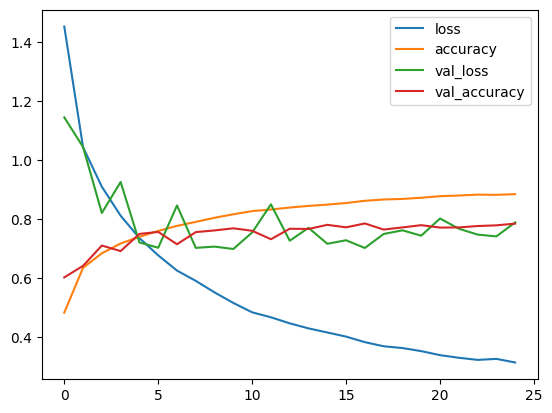

In [ ]:
import numpy
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.constraints import MaxNorm
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
# Set random seed for purposes of reproducibility
seed = 21
from keras.datasets import cifar10
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
# Loading in the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Normalise the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# One-hot encode outputs
y_train = to_categorical(y_train, num_classes=10)  # Assuming 10 classes in CIFAR-10
y_test = to_categorical(y_test, num_classes=10)    # Assuming 10 classes in CIFAR-10
class_num = y_test.shape[1]
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(class_num, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'val_accuracy'])
# print(model.summary())
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
pd.DataFrame(history.history).plot()
plt.show()